In [17]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [18]:
# import data
numerical = pd.read_csv('numerical_cleaned.csv')
numerical.head()

,Sex,Year,Concentration,Hours spent socializing,Party Attendance,Conversation Starting,Correcting someone,Lottery Ticket Price,Borrowed Money,Reward,Email
0,1,2,Special Concentration,3,3,4,3,2,3,5,Jamesrose@college.harvard.edu
1,1,2,Mathematics,3,2,3,3,4,2,5,Hroatman@college.harvard.edu
2,2,3,Sociology,3,3,4,4,3,2,3,kathrynglover@college.harvard.edu
3,1,2,Statistics and Computer Science,3,5,4,2,2,3,6,ssadhuka@college.harvard.edu
4,2,3,OEB,3,5,4,2,5,2,5,Sbakaysa@college.harvard.edu


### Totaling Extraversion and Risk

In [19]:
# total categories
numerical['extraversion_total'] = numerical['Hours spent socializing'] + numerical['Party Attendance'] + numerical['Conversation Starting'] + numerical['Correcting someone']
numerical['risk_total'] = numerical['Lottery Ticket Price'] + numerical['Borrowed Money'] + numerical['Reward']

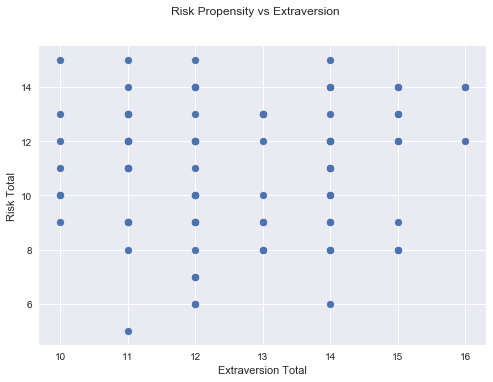

In [20]:
# scatter
plt.scatter(numerical['extraversion_total'], numerical['risk_total'])
plt.xlabel("Extraversion Total")
plt.ylabel('Risk Total')
plt.suptitle('Risk Propensity vs Extraversion')
plt.savefig('test.png', dpi=600)

plt.show()


In [63]:
# linear regression
# x = numerical['extraversion_total']
# y = numerical['risk_total']
# reg = LinearRegression().fit(x, y)

# reg.score(x,y)

In [64]:
columns = ['Hours spent socializing','Party Attendance','Conversation Starting',
           'Correcting someone','Lottery Ticket Price','Borrowed Money']

In [65]:
X = numerical[columns]
y = numerical[['Reward']]

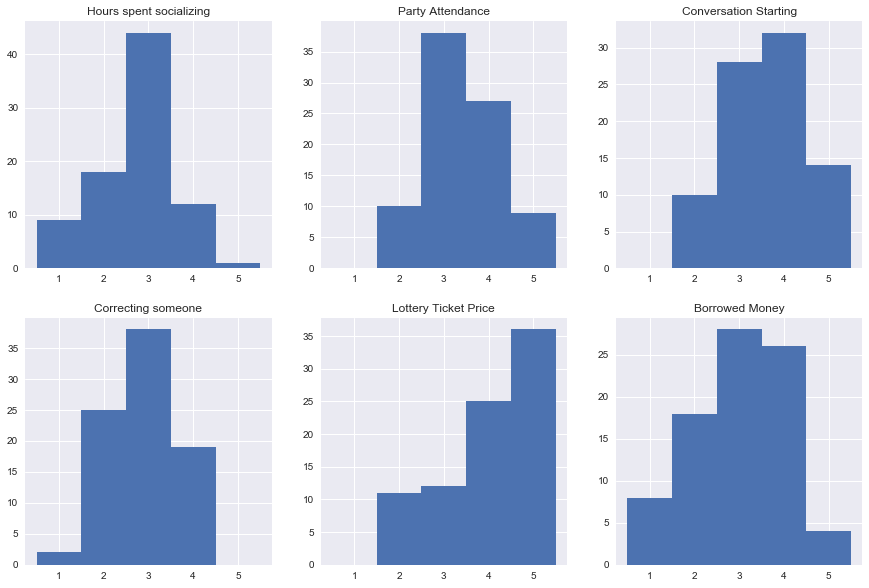

In [66]:
plt.rcParams['figure.figsize']=[15,10]
for i in np.linspace(1,6,6):
    plt.subplot(2,3,i)
    plt.hist(numerical[columns[int(i)-1]], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    plt.title(columns[int(i)-1])


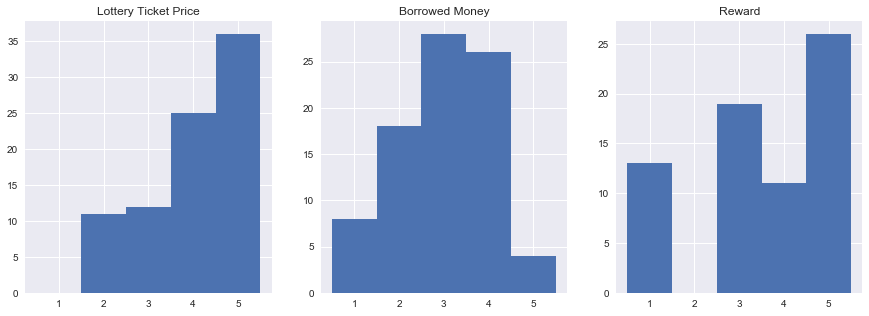

In [67]:
plt.rcParams['figure.figsize']=[15,5]
columns_y = ['Lottery Ticket Price','Borrowed Money','Reward']
for i in np.linspace(1,3,3):
    plt.subplot(1,3,i)
    plt.hist(numerical[columns_y[int(i)-1]], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    plt.title(columns_y[int(i)-1])


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 1)

In [71]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Coefficients: 
 [[-0.33789419 -1.01173554  1.2217893   0.12829436  0.64553275 -0.04104547]]
Variance score: -1.734693460943783


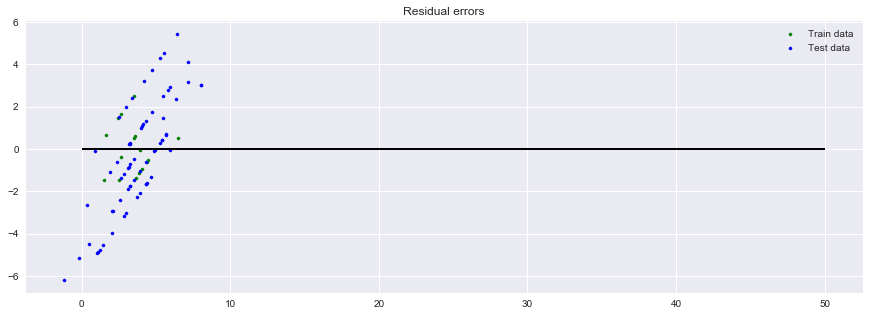

In [72]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper right')
plt.title("Residual errors") 
plt.show() 